# Logistic Regression Model - Identifying Currently Automated Tasks

## Loading The Data

In [1]:
import pandas as pd
import seaborn as sns

In [5]:
data = pd.read_csv("software_engineering_tasks_dataset.csv")
data.head()

,id,task,job_role,complexity,task_type,creativity,human_interaction,time_taken,frequency,skill_level,is_automated
0,1,Deploying applications,AI/ML Engineer,Low,Development,1,Yes,Short,Rarely,Basic,No
1,2,Deploying applications,Frontend Developer,Low,Development,3,No,Long,Monthly,Basic,Yes
2,3,Frontend development,AI/ML Engineer,Low,Maintenance,5,Yes,Short,Rarely,Basic,No
3,4,API integration,Database Administrator,High,Development,2,No,Medium,Monthly,Basic,Yes
4,5,Security auditing,Backend Developer,Medium,Development,4,Yes,Medium,Monthly,Intermediate,Yes


#### Information About The Data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 1000 non-null   int64 
 1   task               1000 non-null   object
 2   job_role           1000 non-null   object
 3   complexity         1000 non-null   object
 4   task_type          1000 non-null   object
 5   creativity         1000 non-null   int64 
 6   human_interaction  1000 non-null   object
 7   time_taken         1000 non-null   object
 8   frequency          1000 non-null   object
 9   skill_level        1000 non-null   object
 10  is_automated       1000 non-null   object
dtypes: int64(2), object(9)
memory usage: 86.1+ KB


#### Removing the ID field as it is not necessary

In [7]:
data.drop(["id"], axis=1, inplace=True)

In [8]:
data.head()

,task,job_role,complexity,task_type,creativity,human_interaction,time_taken,frequency,skill_level,is_automated
0,Deploying applications,AI/ML Engineer,Low,Development,1,Yes,Short,Rarely,Basic,No
1,Deploying applications,Frontend Developer,Low,Development,3,No,Long,Monthly,Basic,Yes
2,Frontend development,AI/ML Engineer,Low,Maintenance,5,Yes,Short,Rarely,Basic,No
3,API integration,Database Administrator,High,Development,2,No,Medium,Monthly,Basic,Yes
4,Security auditing,Backend Developer,Medium,Development,4,Yes,Medium,Monthly,Intermediate,Yes


#### Converting all the non numerical vars to lowercase and replacing space with underscore


In [12]:
data.task = data.task.str.lower()
data.task = data.task.str.replace(" ", "_")
data.head()

,task,job_role,complexity,task_type,creativity,human_interaction,time_taken,frequency,skill_level,is_automated
0,deploying_applications,AI/ML Engineer,Low,Development,1,Yes,Short,Rarely,Basic,No
1,deploying_applications,Frontend Developer,Low,Development,3,No,Long,Monthly,Basic,Yes
2,frontend_development,AI/ML Engineer,Low,Maintenance,5,Yes,Short,Rarely,Basic,No
3,api_integration,Database Administrator,High,Development,2,No,Medium,Monthly,Basic,Yes
4,security_auditing,Backend Developer,Medium,Development,4,Yes,Medium,Monthly,Intermediate,Yes


In [23]:
data.job_role = data.job_role.str.lower()
data.job_role = data.job_role.str.replace(" ", "_")
data.job_role = data.job_role.str.replace("/", "_")

data.complexity = data.complexity.str.lower()
data.complexity = data.complexity.str.replace(" ", "_")

data.task_type = data.task_type.str.lower()
data.task_type = data.task_type.str.replace(" ", "_")

data.time_taken = data.time_taken.str.lower()
data.time_taken = data.time_taken.str.replace(" ", "_")

data.frequency = data.frequency.str.lower()
data.frequency = data.frequency.str.replace(" ", "_")

data.skill_level = data.skill_level.str.lower()
data.skill_level = data.skill_level.str.replace(" ", "_")

data.head()

,task,job_role,complexity,task_type,creativity,human_interaction,time_taken,frequency,skill_level,is_automated
0,deploying_applications,ai_ml_engineer,low,development,1,Yes,short,rarely,basic,No
1,deploying_applications,frontend_developer,low,development,3,No,long,monthly,basic,Yes
2,frontend_development,ai_ml_engineer,low,maintenance,5,Yes,short,rarely,basic,No
3,api_integration,database_administrator,high,development,2,No,medium,monthly,basic,Yes
4,security_auditing,backend_developer,medium,development,4,Yes,medium,monthly,intermediate,Yes


In [14]:
data.to_csv("software_engineering_tasks_dataset_cleaned_halfway.csv", index=False)

#### Checking the values of each categorical column before encoding them

In [24]:
data.job_role.unique()

array(['ai_ml_engineer', 'frontend_developer', 'database_administrator',
       'backend_developer', 'full_stack_developer', 'technical_writer',
       'security_analyst', 'qa_engineer', 'software_architect',
       'data_engineer', 'devops_engineer', 'cloud_engineer'], dtype=object)

In [16]:
data.complexity.unique()

array(['low', 'high', 'medium'], dtype=object)

In [17]:
data.task_type.unique()

array(['development', 'maintenance', 'testing', 'deployment',
       'documentation'], dtype=object)

In [18]:
data.time_taken.unique()

array(['short', 'long', 'medium'], dtype=object)

In [19]:
data.frequency.unique()

array(['rarely', 'monthly', 'daily', 'weekly'], dtype=object)

In [20]:
data.skill_level.unique()

array(['basic', 'intermediate', 'advanced'], dtype=object)

#### Converting the categorical varibale using One-Hot encoding

In [25]:
data_encoded = pd.get_dummies(data, columns=["job_role", "complexity", "task_type", "time_taken", "frequency", "skill_level"])
data_encoded.head()

,task,creativity,human_interaction,is_automated,job_role_ai_ml_engineer,job_role_backend_developer,job_role_cloud_engineer,job_role_data_engineer,job_role_database_administrator,job_role_devops_engineer,...,time_taken_long,time_taken_medium,time_taken_short,frequency_daily,frequency_monthly,frequency_rarely,frequency_weekly,skill_level_advanced,skill_level_basic,skill_level_intermediate
0,deploying_applications,1,Yes,No,True,False,False,False,False,False,...,False,False,True,False,False,True,False,False,True,False
1,deploying_applications,3,No,Yes,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,True,False
2,frontend_development,5,Yes,No,True,False,False,False,False,False,...,False,False,True,False,False,True,False,False,True,False
3,api_integration,2,No,Yes,False,False,False,False,True,False,...,False,True,False,False,True,False,False,False,True,False
4,security_auditing,4,Yes,Yes,False,True,False,False,False,False,...,False,True,False,False,True,False,False,False,False,True


#### Converting the task variable to numerical vectors using TD-IDF

In [56]:
data_encoded.task = data_encoded.task.str.lower()
data_encoded.task = data_encoded.task.str.replace("_", " ")
data_encoded.head()

,task,creativity,human_interaction,is_automated,job_role_ai_ml_engineer,job_role_backend_developer,job_role_cloud_engineer,job_role_data_engineer,job_role_database_administrator,job_role_devops_engineer,...,time_taken_long,time_taken_medium,time_taken_short,frequency_daily,frequency_monthly,frequency_rarely,frequency_weekly,skill_level_advanced,skill_level_basic,skill_level_intermediate
0,deploying applications,1,Yes,No,True,False,False,False,False,False,...,False,False,True,False,False,True,False,False,True,False
1,deploying applications,3,No,Yes,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,True,False
2,frontend development,5,Yes,No,True,False,False,False,False,False,...,False,False,True,False,False,True,False,False,True,False
3,api integration,2,No,Yes,False,False,False,False,True,False,...,False,True,False,False,True,False,False,False,True,False
4,security auditing,4,Yes,Yes,False,True,False,False,False,False,...,False,True,False,False,True,False,False,False,False,True


In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=100)
task_vectors = tfidf.fit_transform(data_encoded.task).toarray()

task_vectors_df = pd.DataFrame(task_vectors, columns=tfidf.get_feature_names_out())

data_encoded_final = pd.concat([task_vectors_df, data_encoded], axis=1)
data_encoded_final.head()

,api,applications,architecture,auditing,automated,backend,bug,cloud,code,continuous,...,time_taken_long,time_taken_medium,time_taken_short,frequency_daily,frequency_monthly,frequency_rarely,frequency_weekly,skill_level_advanced,skill_level_basic,skill_level_intermediate
0,0.000000,0.707107,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,True,False,False,True,False,False,True,False
1,0.000000,0.707107,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,False,False,True,False,False,False,True,False
2,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,True,False,False,True,False,False,True,False
3,0.767929,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,False,True,False,False,True,False,False,False,True,False
4,0.000000,0.000000,0.0,0.707107,0.0,0.0,0.0,0.0,0.0,0.0,...,False,True,False,False,True,False,False,False,False,True


#### Converting the Yes/No value columns to 0s and 1s

In [58]:
data_encoded_final.human_interaction = data_encoded_final.human_interaction.map({"Yes": 1, "No": 0})
data_encoded_final.is_automated = data_encoded_final.is_automated.map({"Yes": 1, "No": 0})

In [59]:
data_encoded_final.human_interaction

,human_interaction
0,1
1,0
2,1
3,0
4,1
...,...
995,0
996,0
997,1
998,0


In [64]:
data_encoded_final.is_automated

,is_automated
0,0
1,1
2,0
3,1
4,1
...,...
995,1
996,1
997,1
998,0


#### Exporting the finalized dataset

In [66]:
data_encoded_final.to_csv("software_engineering_tasks_dataset_cleaned.csv", index=False)

<Axes: xlabel='is_automated'>

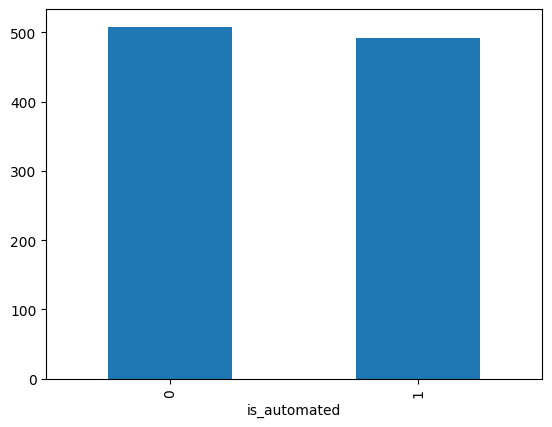

In [67]:
data_encoded_final.is_automated.value_counts().plot(kind="bar")